In [36]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


Импорт необходимых библиотек и загрузка данных

In [168]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
from sklearn import preprocessing

df = pd.read_csv('all.csv')

In [169]:
df['have_loggia'].value_counts(1)

have_loggia
-1                     0.431065
1 лоджия               0.253731
1 балкон               0.245004
2 лоджии               0.025044
1 лоджия, 1 балкон     0.022768
2 балкона              0.015558
3 лоджии               0.002277
3 балкона              0.001518
2 лоджии, 1 балкон     0.001012
1 лоджия, 2 балкона    0.000885
4 лоджии               0.000506
2 лоджии, 2 балкона    0.000379
4 балкона              0.000126
have_loggia            0.000126
Name: proportion, dtype: float64

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   author                7592 non-null   object
 1   author_type           7595 non-null   object
 2   url                   7906 non-null   object
 3   location              7906 non-null   object
 4   deal_type             7906 non-null   object
 5   accommodation_type    7906 non-null   object
 6   floor                 7906 non-null   object
 7   floors_count          7906 non-null   object
 8   rooms_count           7906 non-null   object
 9   total_meters          7906 non-null   object
 10  price                 7893 non-null   object
 11  year_of_construction  7906 non-null   object
 12  object_type           7906 non-null   object
 13  have_loggia           7906 non-null   object
 14  parking_type          7906 non-null   object
 15  house_material_type   7906 non-null   

In [136]:
df.head(13) #проверяем загрузился ли датасет и знакомимся с ним

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,house_material_type,heating_type,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,2350000,1917,Вторичка,-1,Наземная,-1,-1,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,4150000,1975,Вторичка,-1,-1,-1,-1,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,1700000,-1,Вторичка,-1,-1,-1,-1,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,2500000,1968,Вторичка,-1,-1,-1,-1,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,3000000,2009,Вторичка,-1,Наземная,-1,-1,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
5,Максим Юсов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304233768/,Серпухов,sale,flat,2,3,1,46.7,6599999,-1,Вторичка,-1,-1,-1,-1,-1,25 м²,6 м²,79647820594,-1,Серпухов,2-я Московская,6к3,NaN,NaN
6,ID 9655060,unknown,https://serpukhov.cian.ru/sale/flat/304697154/,Серпухов,sale,flat,3,5,1,29.0,3350000,1917,Вторичка,-1,Наземная,-1,-1,-1,25 м²,-1,79645658245,3 м,Серпухов,Форсса,10,NaN,NaN
7,Этажи Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304332318/,Серпухов,sale,flat,3,6,1,19.1,3600000,1917,Вторичка,-1,-1,-1,-1,-1,-1,-1,79647821411,-1,Серпухов,Крюкова,4,NaN,NaN
8,Ольга Протченко,realtor,https://serpukhov.cian.ru/sale/flat/295915722/,Серпухов,sale,flat,1,2,1,27.1,1900000,1969,Вторичка,-1,Наземная,-1,-1,-1,18 м²,6 м²,79671343432,"2,5 м",NaN,NaN,NaN,NaN,NaN
9,Глеб Маслов,realtor,https://serpukhov.cian.ru/sale/flat/304548494/,Серпухов,sale,flat,6,9,2,42.7,3990000,1980,Вторичка,1 лоджия,Наземная,-1,-1,-1,"29,7 м²","5,6 м²",79150509841,"2,7 м",Серпухов,Весенняя,56,NaN,NaN


Обозначения 
Колонка  | Значение
---------|------------
url | ссылка
location | город
deal_type| тип объявления (продажа/аренда)
accommodation_type| тип жилья
floor| этаж
floors_count| количество этажей
total_meters| площадь квартиры
price| стоимость
seller.agent.is_agent| является ли продавец агентом
year_of_construction| год постройки здания
object_type|  тип жилья
have_loggia| наличие лоджий
house_material_type| тип дома (монолитный, панельный и т.д.)
heating_type| тип отопления
finish_type| отделка
living_meters| жилая площадь
kitchen_meters| площадь кухни
phone| телефон
ceiling_height| высота потолка
district| район
street| улица
house_number| номер дома
underground| метро
residential_complex| жилой комплекс

Пустые значения парсер заполняет как -1. Заменяем их на nan

In [137]:
df.replace('-1', np.nan, inplace=True)

Очистка и анализ

In [138]:
df.columns #смотрим колонки

Index(['author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'floor', 'floors_count', 'rooms_count',
       'total_meters', 'price', 'year_of_construction', 'object_type',
       'have_loggia', 'parking_type', 'house_material_type', 'heating_type',
       'finish_type', 'living_meters', 'kitchen_meters', 'phone',
       'ceiling_height', 'district', 'street', 'house_number', 'underground',
       'residential_complex'],
      dtype='object')

In [139]:
#удаляем лишние колонки
df = df.drop(['author', 'author_type', 'url', 'phone', 'house_number', 'street', 'deal_type', 'residential_complex', 'house_material_type', 'district', 'finish_type', 'heating_type', 'accommodation_type'], axis=1)

# 'author' - не влияет на цену
# 'author_type' - не влияет на цену
# 'url' - не влияет на цену
# 'phone' - не влияет на цену
# 'house_number' - не влияет на цену
# 'street' - оставил location
# 'deal_type' - все значения 'sale'
# 'residential_complex' - оставил location
# 'house_material_type' - около 80% пропусков
# 'district' - оставил location
# 'finish_type' - - около 80% пропусков
# heating_type' - полностью пусто
# 'accommodation_type' - все значения flat

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7906 non-null   object
 1   floor                 7906 non-null   object
 2   floors_count          7906 non-null   object
 3   rooms_count           7806 non-null   object
 4   total_meters          7906 non-null   object
 5   price                 7893 non-null   object
 6   year_of_construction  6537 non-null   object
 7   object_type           7906 non-null   object
 8   have_loggia           4498 non-null   object
 9   parking_type          4412 non-null   object
 10  living_meters         6124 non-null   object
 11  kitchen_meters        6555 non-null   object
 12  ceiling_height        5135 non-null   object
 13  underground           5511 non-null   object
dtypes: object(14)
memory usage: 918.1+ KB


Очищаем пустые строки

In [141]:
df = df.dropna(how='all')

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8392
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7906 non-null   object
 1   floor                 7906 non-null   object
 2   floors_count          7906 non-null   object
 3   rooms_count           7806 non-null   object
 4   total_meters          7906 non-null   object
 5   price                 7893 non-null   object
 6   year_of_construction  6537 non-null   object
 7   object_type           7906 non-null   object
 8   have_loggia           4498 non-null   object
 9   parking_type          4412 non-null   object
 10  living_meters         6124 non-null   object
 11  kitchen_meters        6555 non-null   object
 12  ceiling_height        5135 non-null   object
 13  underground           5511 non-null   object
dtypes: object(14)
memory usage: 926.5+ KB


"price" колонка должна быть int или float а не object

In [143]:
# Заменяем 'price' на NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Удаляем строки с NaN
df = df.dropna(subset=['price'])

df['price'] = df['price'].astype(float)

df['price'].info()

<class 'pandas.core.series.Series'>
Index: 7892 entries, 0 to 8392
Series name: price
Non-Null Count  Dtype  
--------------  -----  
7892 non-null   float64
dtypes: float64(1)
memory usage: 123.3 KB


<Axes: >

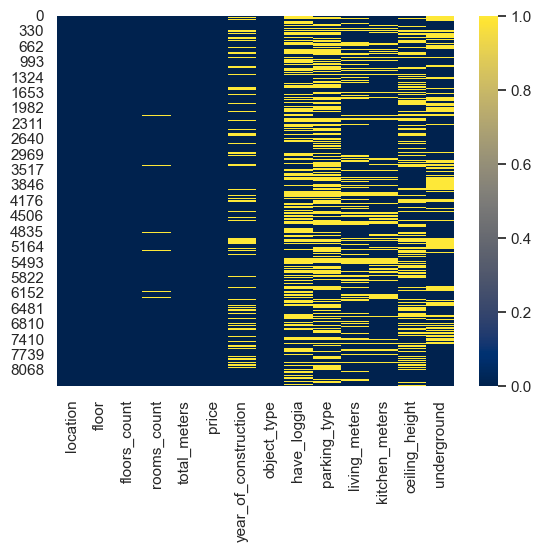

In [144]:
sns.heatmap(df.isnull(),cmap='cividis')

В колонках have_loggia и parking_type заменим nan-ы на 0

<Axes: >

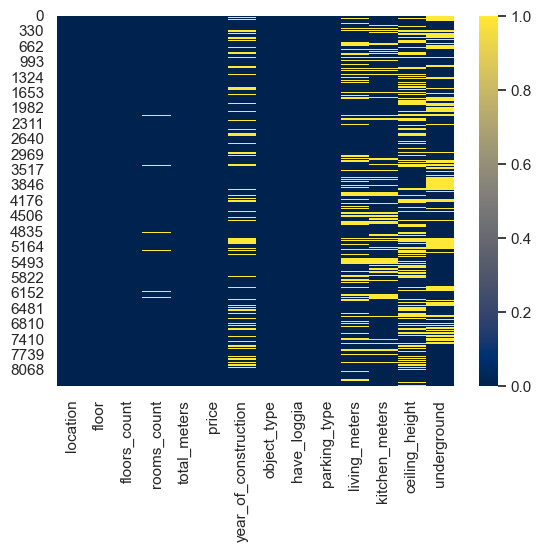

In [145]:
df['have_loggia'] = df['have_loggia'].fillna('0')
df['parking_type'] = df['parking_type'].fillna('0')

sns.heatmap(df.isnull(),cmap='cividis')

Форматируем данные (18 м² -> 18)

In [146]:
def safe_float_conversion(value):
    if isinstance(value, str):
        # Удаляем лишние символы
        cleaned_value = re.sub(r'[^0-9.-]', '', value)
        try:
            return float(cleaned_value)
        except ValueError:
            return value
    return value

# Применение функции к каждому столбцу]
  
df = df.apply(lambda x: x.apply(safe_float_conversion))
df


,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,underground
0,Серпухов,6.0,6.0,1.0,20.7,2350000.0,1917.0,Вторичка,0.0,Наземная,18.0,1.0,3.0,NaN
1,Серпухов,1.0,9.0,1.0,33.0,4150000.0,1975.0,Вторичка,0.0,0.0,18.0,6.0,27.0,Аннино
2,Серпухов,4.0,4.0,1.0,14.0,1700000.0,NaN,Вторичка,0.0,0.0,NaN,NaN,NaN,NaN
3,Серпухов,5.0,5.0,1.0,17.5,2500000.0,1968.0,Вторичка,0.0,0.0,NaN,NaN,NaN,NaN
4,Серпухов,4.0,7.0,1.0,25.9,3000000.0,2009.0,Вторичка,0.0,Наземная,20.0,5.0,35.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,Мытищи,8.0,14.0,2.0,69.7,11400000.0,2018.0,Вторичка,0.0,0.0,38.0,105.0,NaN,Медведково
8389,Мытищи,19.0,25.0,2.0,48.1,8607014.0,2025.0,Новостройка,0.0,Открытая,227.0,161.0,262.0,Ростокино
8390,Мытищи,3.0,5.0,2.0,45.0,7300000.0,1968.0,Вторичка,1.0,0.0,NaN,6.0,NaN,Медведково
8391,Мытищи,3.0,6.0,2.0,34.0,6400000.0,2023.0,Вторичка,1.0,Открытая,19.0,8.0,275.0,Медведково


Удаляем дубликаты

In [147]:
df = df.drop_duplicates()

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8392
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7192 non-null   object 
 1   floor                 7192 non-null   float64
 2   floors_count          7192 non-null   float64
 3   rooms_count           7099 non-null   float64
 4   total_meters          7192 non-null   float64
 5   price                 7192 non-null   float64
 6   year_of_construction  5943 non-null   object 
 7   object_type           7192 non-null   object 
 8   have_loggia           7192 non-null   float64
 9   parking_type          7192 non-null   object 
 10  living_meters         5588 non-null   float64
 11  kitchen_meters        6001 non-null   float64
 12  ceiling_height        4661 non-null   float64
 13  underground           4989 non-null   object 
dtypes: float64(9), object(5)
memory usage: 842.8+ KB


Приводим 'year_of_construction' к int

In [149]:
# # Функция для проверки, является ли значение числом
# def is_number(value):
#     try:
#         int(value)
#         return True
#     except ValueError:
#         return False

# # Применяем функцию и заменяем нечисловые значения на -1
# df.loc[:, 'year_of_construction'] = df['year_of_construction'].apply(lambda x: int(x) if is_number(x) else -1)

# # Преобразуем столбец в int
# df.loc[:, 'year_of_construction'] = df['year_of_construction'].astype(int)

# Заменяем на NaN
df['year_of_construction'] = pd.to_numeric(df['year_of_construction'], errors='coerce')

# Удаляем строки с NaN
df = df.dropna(subset=['year_of_construction'])

df['year_of_construction'] = df['year_of_construction'].astype(int)

# Проверяем тип данных
print(df['year_of_construction'].dtype)  # Должно быть int64

# Выводим уникальные значения
print(df['year_of_construction'].unique())

int64
[1917 1975 1968 2009 1969 1980 1990 1964 2025 2015 1970 1984 1965 2010
 1992 2011 1986 1994 1956 1966 1973 1971 1957 2013 1981 1972 1959 2004
 1962 2019 1978 1977 2003 1963 1952 2024 2007 1995 1976 1982 1953 2008
 2026 2023 1941 1993 2016 2027 2017 2022 1932 2012 1960 2006 1926 2020
 1943 2014 2021 1967 1904 2028 1991 2018 1987 1988 1974 1979 1929 1989
 1985 1930 2005 1958 1996 1940 1948 1961 1938 1997 2002 2001 1999 1983
 1998 1902 2000 1915 1910 1939 1954 1897 1955 1900 1949 1947 1901 1909
 1600 1951 1936 1931 1950 1934 1928 1945 1937 1927 1896 1777 2031 1935]


/var/folders/h7/3n282g152_x5l_757w1zr7p00000gn/T/ipykernel_15878/14041559.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_construction'] = pd.to_numeric(df['year_of_construction'], errors='coerce')


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5893 entries, 0 to 8392
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              5893 non-null   object 
 1   floor                 5893 non-null   float64
 2   floors_count          5893 non-null   float64
 3   rooms_count           5830 non-null   float64
 4   total_meters          5893 non-null   float64
 5   price                 5893 non-null   float64
 6   year_of_construction  5893 non-null   int64  
 7   object_type           5893 non-null   object 
 8   have_loggia           5893 non-null   float64
 9   parking_type          5893 non-null   object 
 10  living_meters         4548 non-null   float64
 11  kitchen_meters        4863 non-null   float64
 12  ceiling_height        4326 non-null   float64
 13  underground           4235 non-null   object 
dtypes: float64(9), int64(1), object(4)
memory usage: 690.6+ KB


Распределение цены по годам

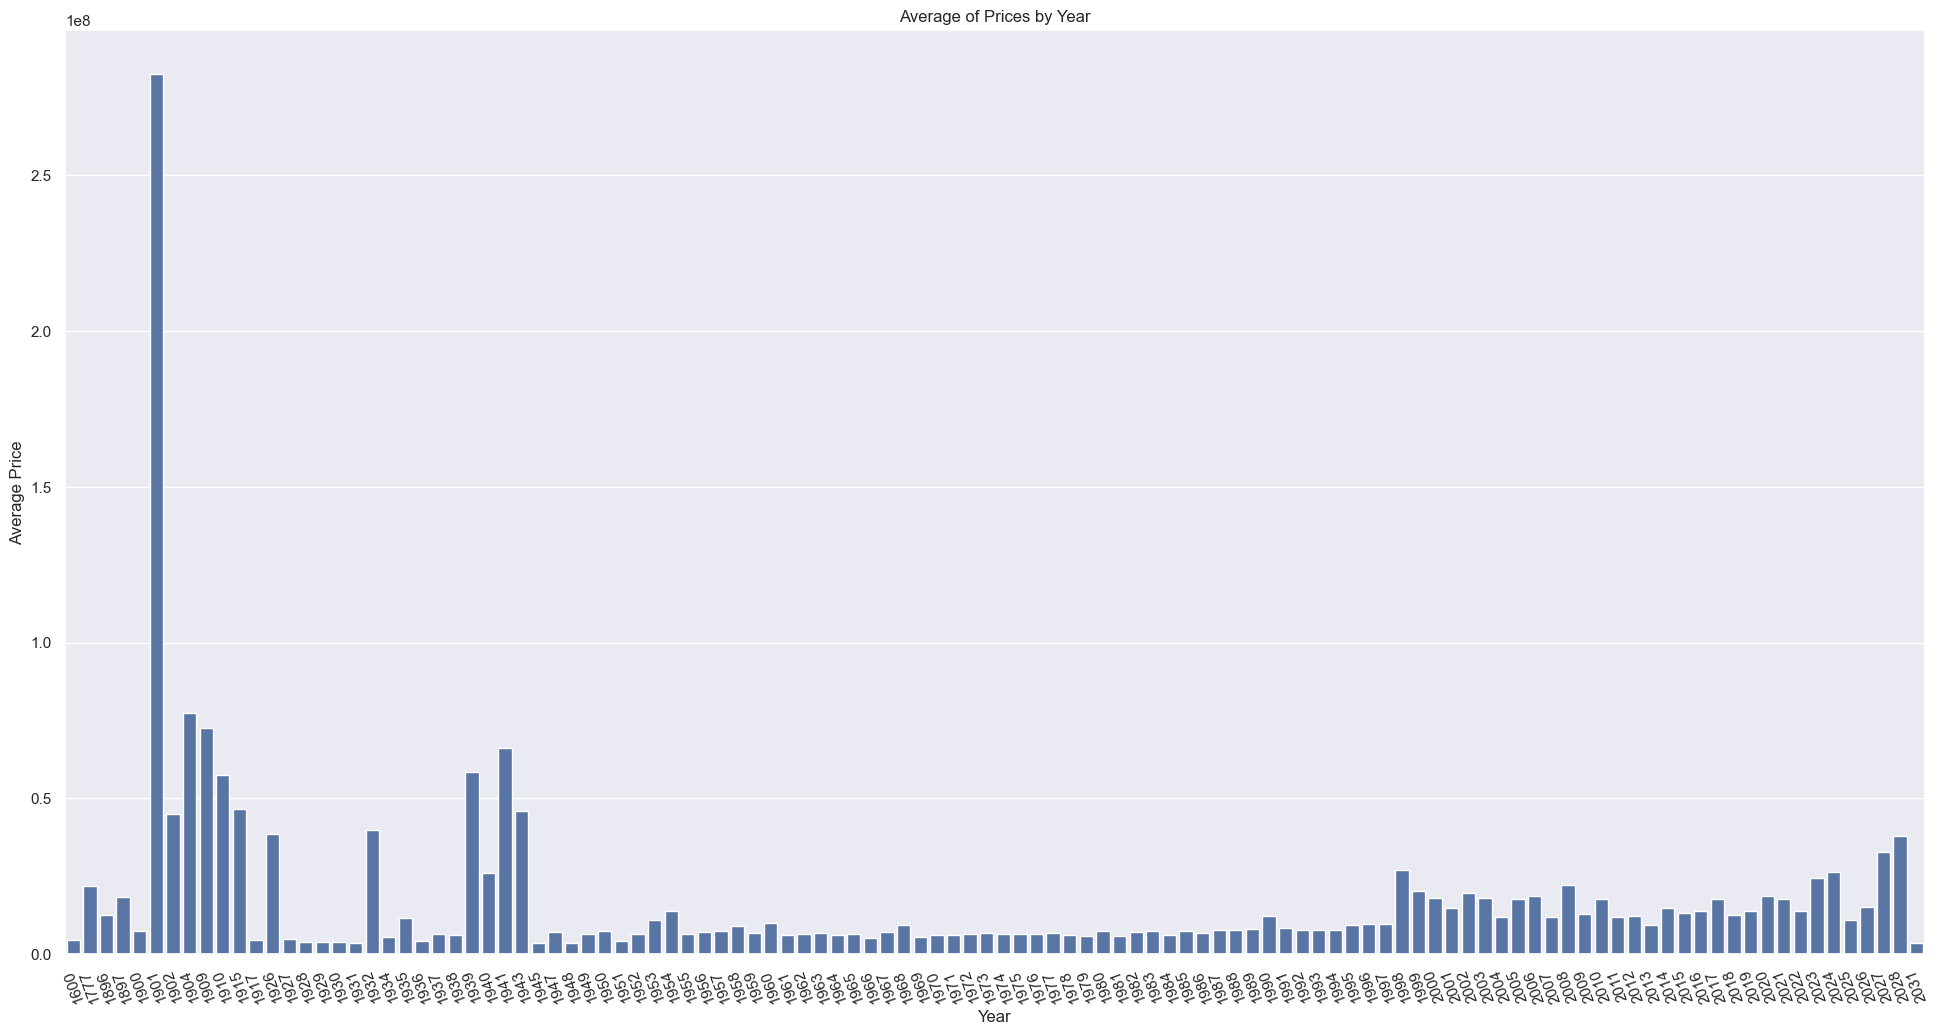

In [151]:
average_prices = df.groupby('year_of_construction')['price'].mean().reset_index()
average_prices

sns.set(style="darkgrid")
plt.figure(figsize=(24, 12))
sns.barplot(x='year_of_construction', y='price', data=average_prices)
plt.title('Average of Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=110)

plt.show()

Удаляем все что раньше 1900 и позже 2024

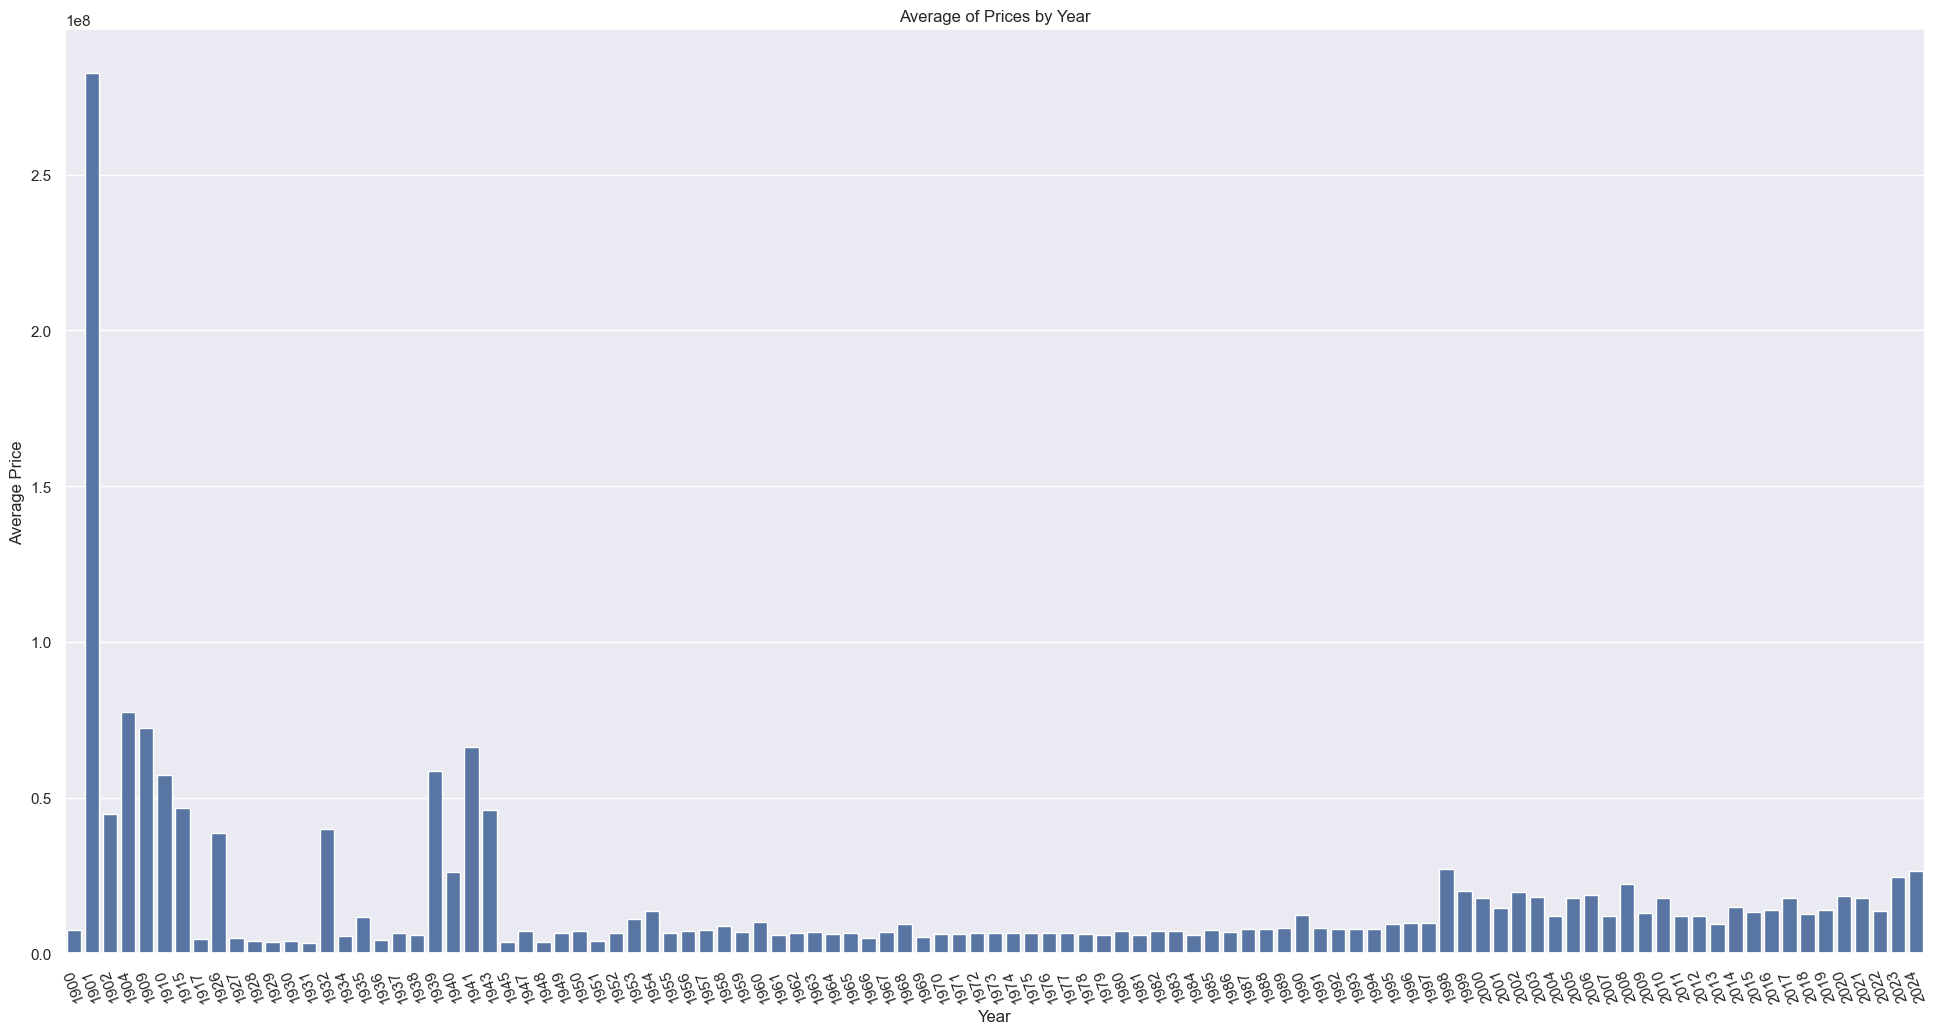

In [152]:
df = df[(df['year_of_construction'] >= 1900) & (df['year_of_construction'] <= 2024)]

average_prices = df.groupby('year_of_construction')['price'].mean().reset_index()
average_prices

sns.set(style="darkgrid")
plt.figure(figsize=(24, 12))
sns.barplot(x='year_of_construction', y='price', data=average_prices)
plt.title('Average of Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=110)

plt.show()

Пропуски в living_meters и kitchen_meters

In [153]:
df.drop(df[(pd.isna(df['living_meters'])) & (pd.isna(df['kitchen_meters']))].index, inplace=True)

df.loc[pd.isna(df['living_meters']), 'living_meters'] = df['total_meters'] - df['kitchen_meters']

df.loc[pd.isna(df['kitchen_meters']), 'kitchen_meters'] = df['total_meters'] - df['living_meters']

<Axes: >

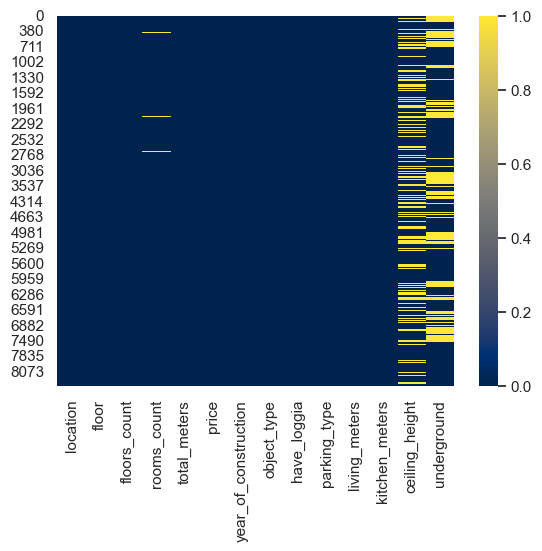

In [154]:
sns.heatmap(df.isnull(),cmap='cividis')

Метро

In [155]:
df.loc[pd.notna(df['underground']), 'underground'] = 1
df.loc[pd.isna(df['underground']), 'underground'] = 0

Количество комнат

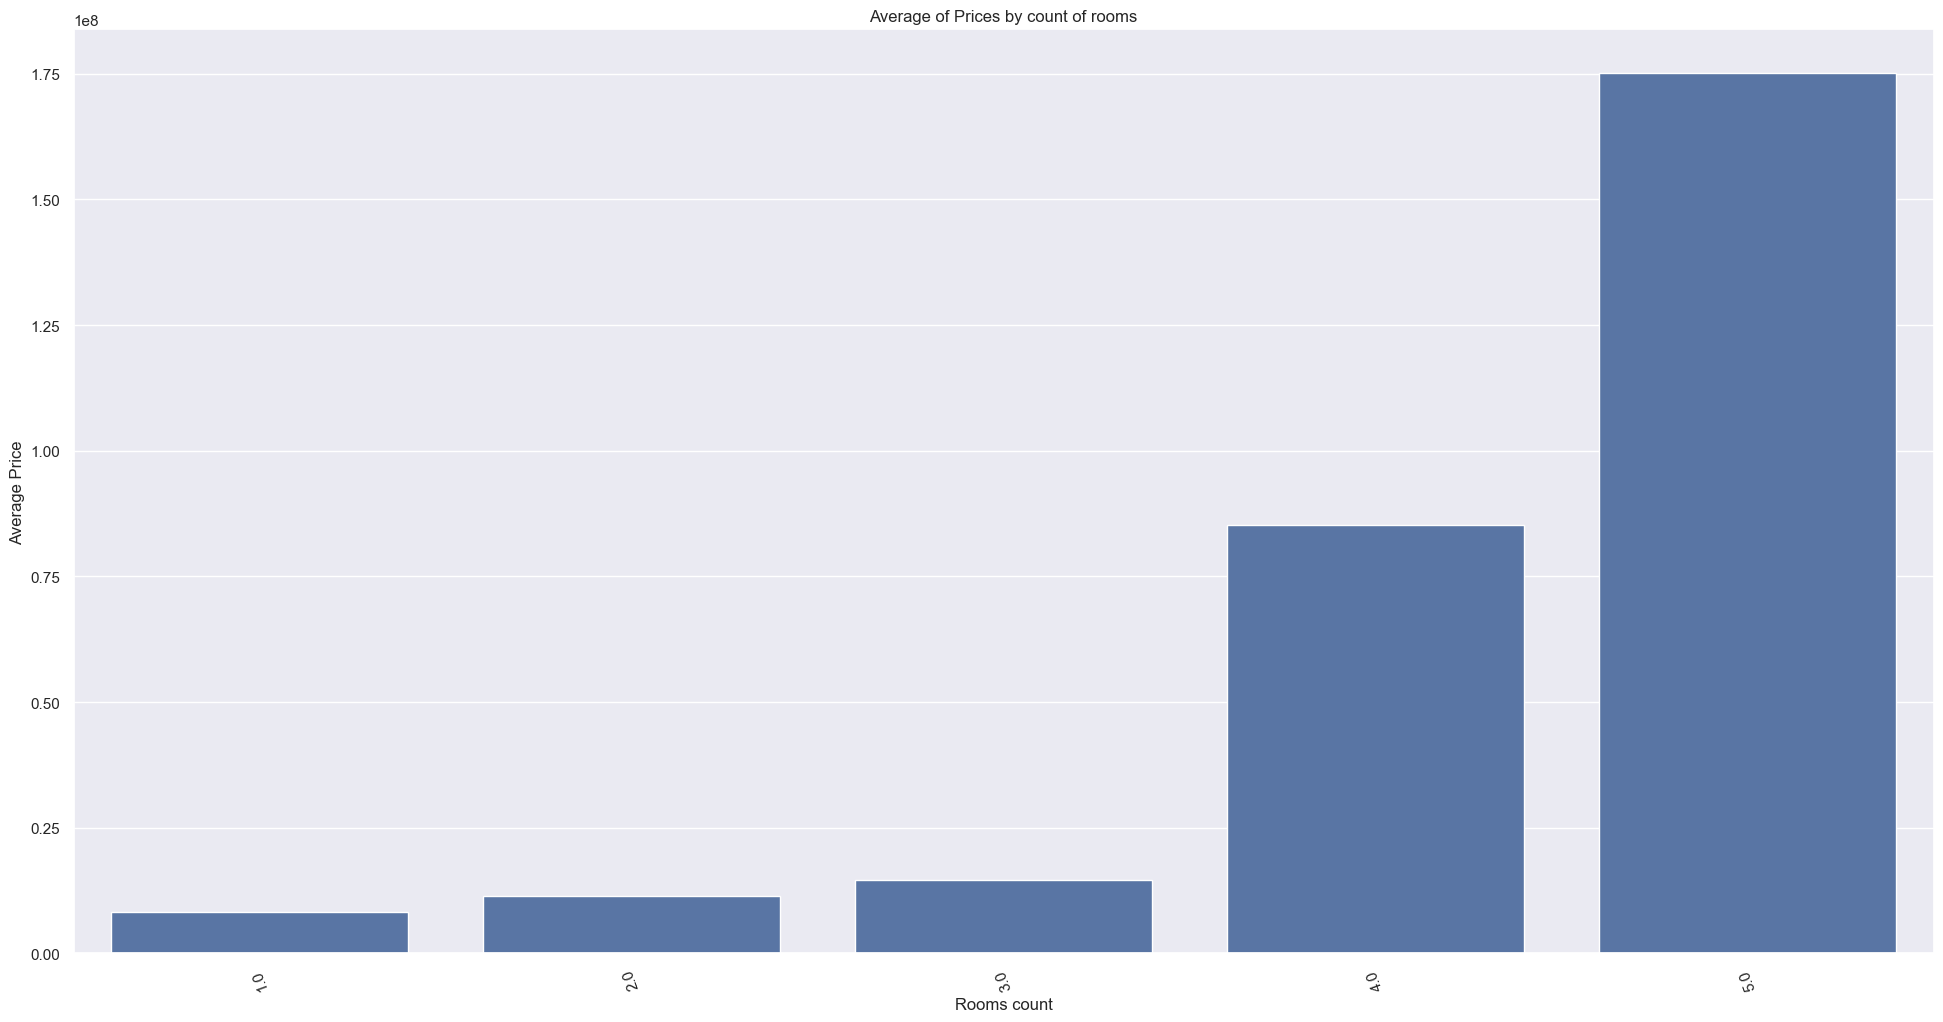

In [156]:
df = df.dropna(subset=['rooms_count'])

average_prices = df.groupby('rooms_count')['price'].mean().reset_index()
average_prices

sns.set(style="darkgrid")
plt.figure(figsize=(24, 12))
sns.barplot(x='rooms_count', y='price', data=average_prices)
plt.title('Average of Prices by count of rooms')
plt.xlabel('Rooms count')
plt.ylabel('Average Price')
plt.xticks(rotation=110)

plt.show()

Высота потолков

In [157]:
df.loc[df['ceiling_height'].nlargest(5).index]

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,underground
4127,Долгопрудный,5.0,19.0,2.0,67.60,15700000.0,2015,Вторичка,1.0,Наземная,392.0,114.0,2.780000e+16,1
5849,Москва,6.0,6.0,5.0,310.15,325657500.0,2023,Вторичка / Апартаменты,0.0,Подземная,1969.0,227.0,4.550000e+02,1
1467,Яхрома,8.0,8.0,1.0,35.20,7000000.0,2022,Вторичка,1.0,Наземная,115.0,15.0,3.750000e+02,1
1271,Балашиха,8.0,9.0,1.0,34.80,5350000.0,1983,Вторичка,0.0,0.0,-23.2,58.0,3.740000e+02,1
2998,Москва,4.0,4.0,4.0,288.00,574431000.0,2024,Вторичка,2.0,0.0,268.0,20.0,3.720000e+02,1


In [158]:
df.loc[df['ceiling_height'].nsmallest(5).index]

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,underground
2927,Москва,8.0,17.0,1.0,36.2,27000000.0,1968,Вторичка,0.0,Наземная,22.0,8.0,2.0,1
5347,Видное,10.0,17.0,1.0,38.3,9700000.0,2016,Вторичка,11.0,Открытая,18.0,9.0,2.0,1
6171,Люберцы,22.0,25.0,2.0,90.0,17900000.0,2012,Вторичка,1.0,Открытая,48.0,15.0,2.0,1
8200,Мытищи,11.0,13.0,1.0,33.6,3000000.0,2018,Вторичка / Апартаменты,0.0,Наземная,20.0,10.0,2.0,1
0,Серпухов,6.0,6.0,1.0,20.7,2350000.0,1917,Вторичка,0.0,Наземная,18.0,1.0,3.0,0


In [159]:
# Удаляем выбросы

df.drop(4127, inplace=True)
df.drop(2927, inplace=True)
df.drop(5347, inplace=True)
df.drop(6171, inplace=True)
df.drop(8200, inplace=True)

In [160]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean()).round(2)
df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,underground
0,Серпухов,6.0,6.0,1.0,20.7,2350000.0,1917,Вторичка,0.0,Наземная,18.0,1.0,3.00,0
1,Серпухов,1.0,9.0,1.0,33.0,4150000.0,1975,Вторичка,0.0,0.0,18.0,6.0,27.00,1
4,Серпухов,4.0,7.0,1.0,25.9,3000000.0,2009,Вторичка,0.0,Наземная,20.0,5.0,35.00,0
6,Серпухов,3.0,5.0,1.0,29.0,3350000.0,1917,Вторичка,0.0,Наземная,25.0,4.0,3.00,0
8,Серпухов,1.0,2.0,1.0,27.1,1900000.0,1969,Вторичка,0.0,Наземная,18.0,6.0,25.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8385,Мытищи,17.0,17.0,2.0,52.2,9850000.0,2013,Вторичка,1.0,Наземная,27.0,109.0,28.00,1
8387,Мытищи,2.0,7.0,2.0,60.0,11950000.0,2017,Вторичка,0.0,Подземная,35.0,18.0,285.00,1
8388,Мытищи,8.0,14.0,2.0,69.7,11400000.0,2018,Вторичка,0.0,0.0,38.0,105.0,82.16,1
8390,Мытищи,3.0,5.0,2.0,45.0,7300000.0,1968,Вторичка,1.0,0.0,39.0,6.0,82.16,1


<Axes: >

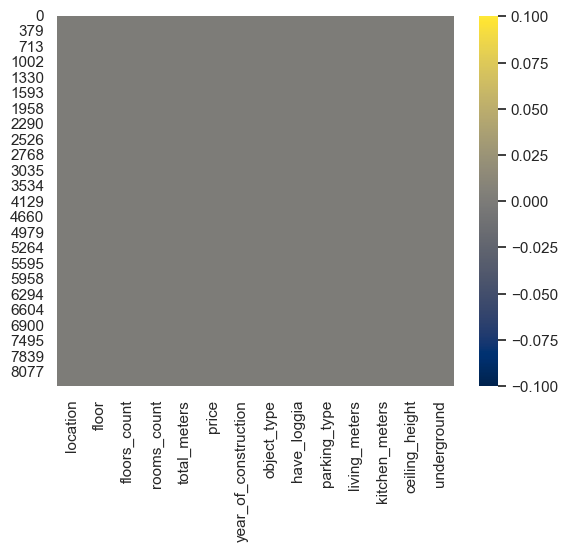

In [161]:
sns.heatmap(df.isnull(),cmap='cividis')

Средняя цена по городам

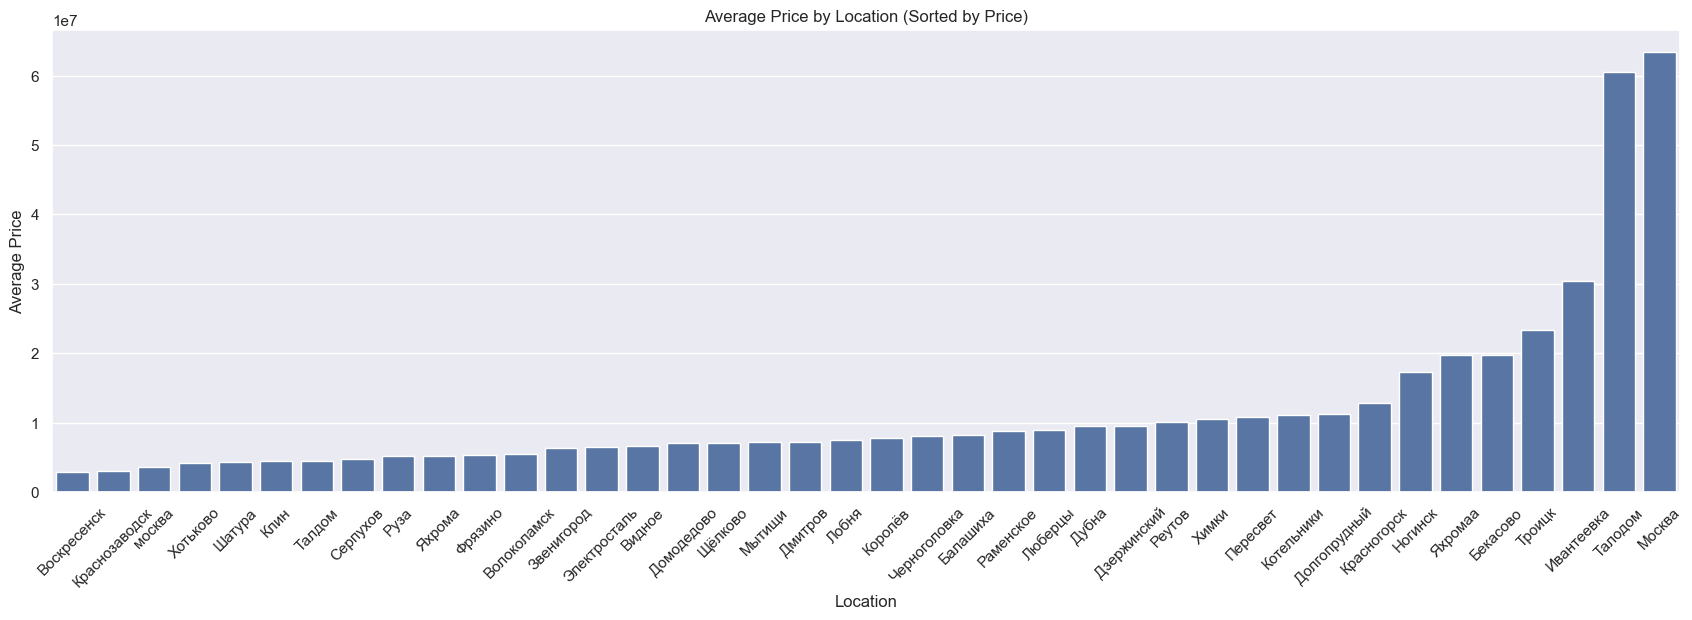

In [162]:
average_prices = df.groupby('location')['price'].mean().reset_index()

# Сортировка по возрастанию средней цены
average_prices_sorted = average_prices.sort_values(by='price')

sns.set(style="darkgrid")
plt.figure(figsize=(21, 6))
sns.barplot(x='location', y='price', data=average_prices_sorted)
plt.title('Average Price by Location (Sorted by Price)')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

plt.show()

Кодирование

In [163]:
#Напишем функцию, которая принимает на вход наши данные, кодирует числовыми значениями категориальные признаки
#и возвращает обновленный данные и сами кодировщики
def number_encode_features(init_df):
    result = init_df.copy()  # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result[column].dtype == object:  # если тип столбца - строка, то нужно его закодировать
            # Преобразуем все значения в строки
            result[column] = result[column].astype(str)
            encoders[column] = preprocessing.LabelEncoder()  # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column])  # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) #Теперь encoded data содержит закодированные категориальные признаки
encoded_data.head() #проверяем

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,underground
0,26,6.0,6.0,1.0,20.7,2350000.0,1917,0,0.0,2,18.0,1.0,3.0,0
1,26,1.0,9.0,1.0,33.0,4150000.0,1975,0,0.0,0,18.0,6.0,27.0,1
4,26,4.0,7.0,1.0,25.9,3000000.0,2009,0,0.0,2,20.0,5.0,35.0,0
6,26,3.0,5.0,1.0,29.0,3350000.0,1917,0,0.0,2,25.0,4.0,3.0,0
8,26,1.0,2.0,1.0,27.1,1900000.0,1969,0,0.0,2,18.0,6.0,25.0,0


Корреляция

<Axes: >

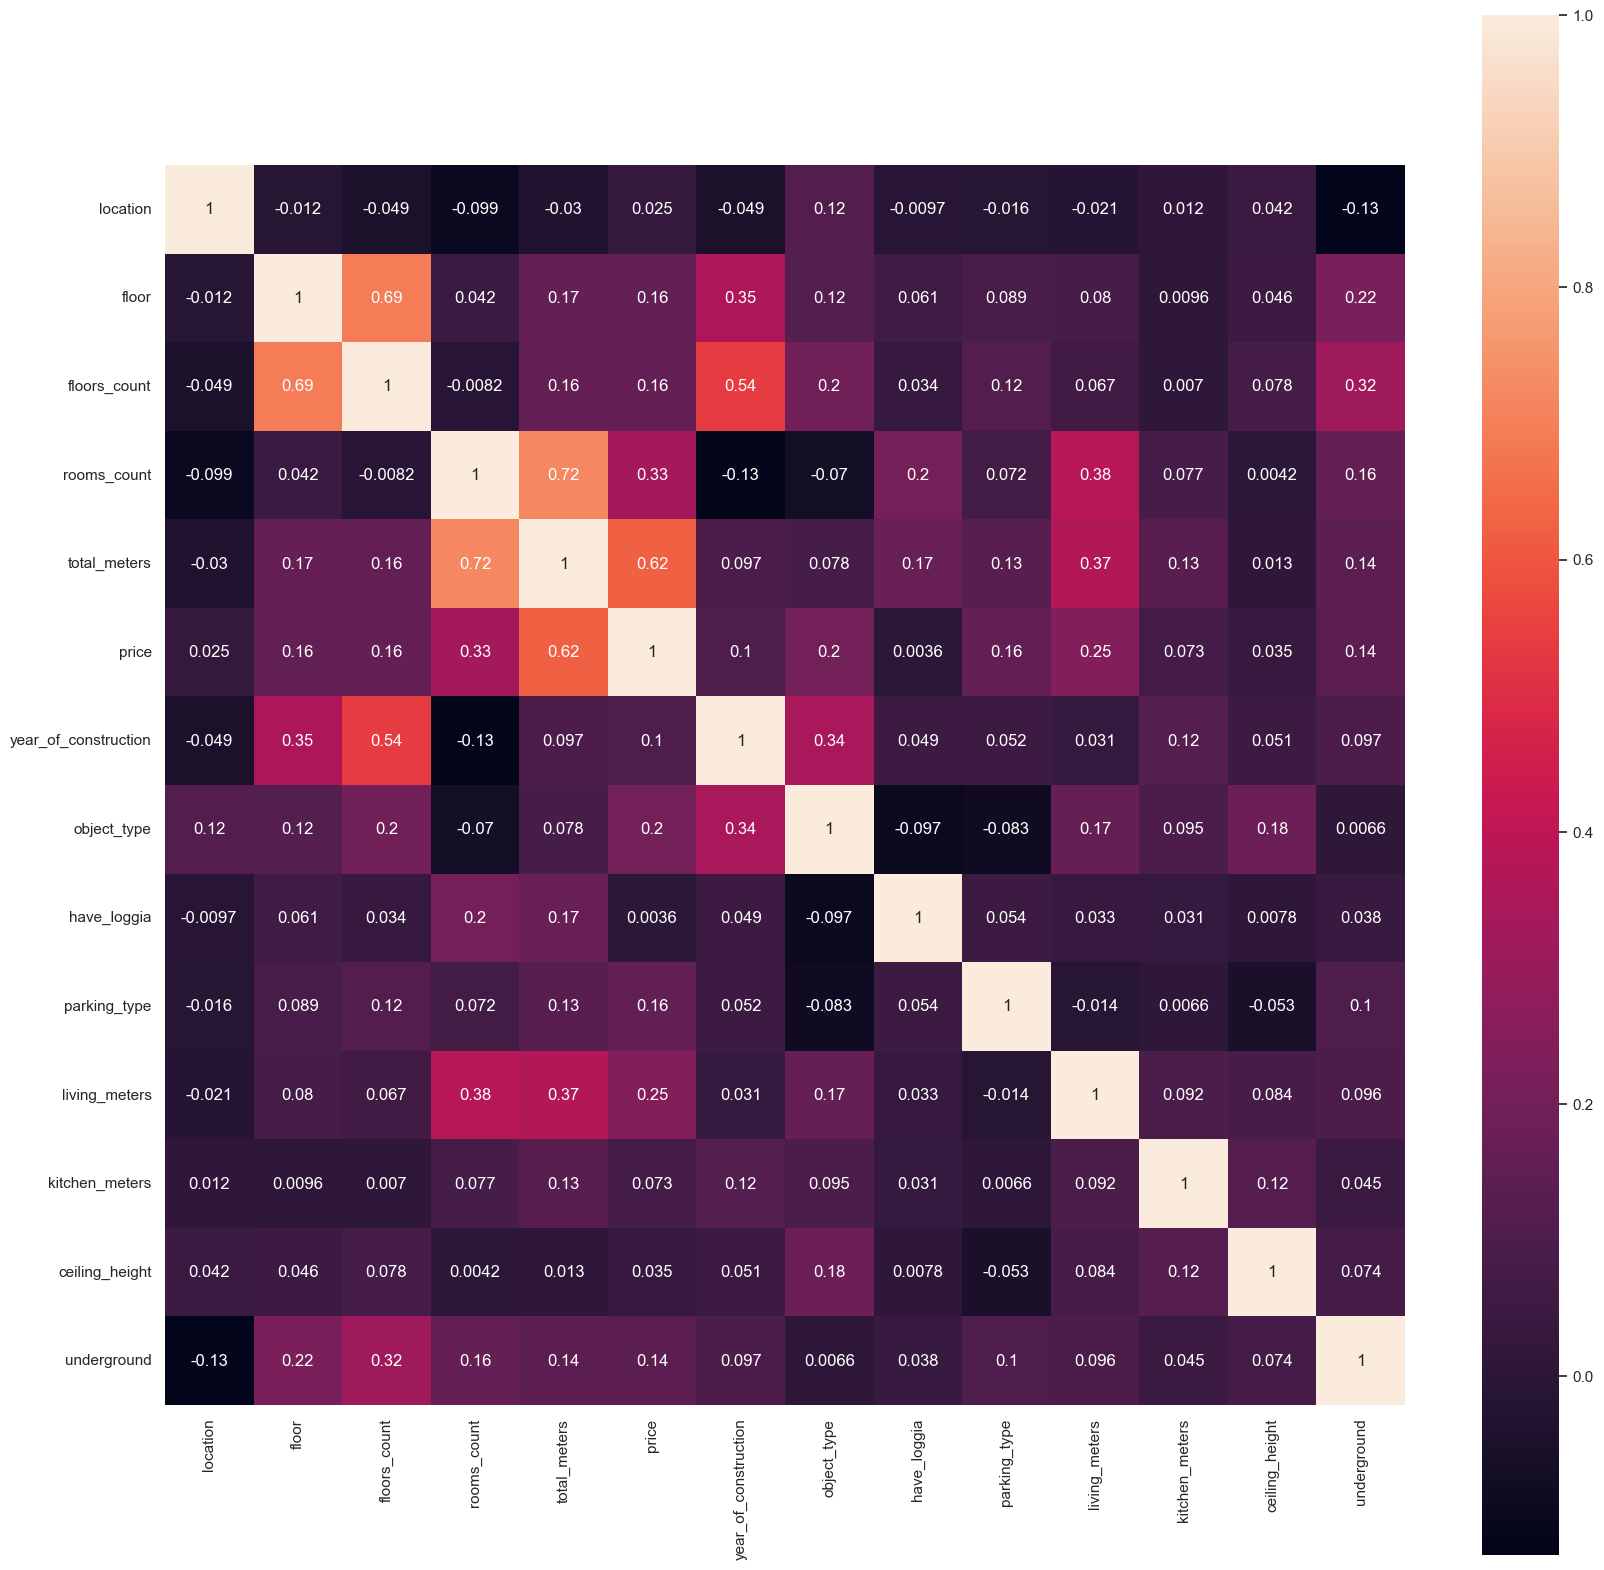

In [164]:
plt.subplots(figsize=(20,20))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True, annot=True)  #можем заметить, что есть пересечения с price и total_meters

Добавим колонку с ценой за квадратный метр

In [165]:
df['price_per_square_meter'] = df['price'] / df['total_meters']
df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,underground,price_per_square_meter
0,Серпухов,6.0,6.0,1.0,20.7,2350000.0,1917,Вторичка,0.0,Наземная,18.0,1.0,3.00,0,113526.570048
1,Серпухов,1.0,9.0,1.0,33.0,4150000.0,1975,Вторичка,0.0,0.0,18.0,6.0,27.00,1,125757.575758
4,Серпухов,4.0,7.0,1.0,25.9,3000000.0,2009,Вторичка,0.0,Наземная,20.0,5.0,35.00,0,115830.115830
6,Серпухов,3.0,5.0,1.0,29.0,3350000.0,1917,Вторичка,0.0,Наземная,25.0,4.0,3.00,0,115517.241379
8,Серпухов,1.0,2.0,1.0,27.1,1900000.0,1969,Вторичка,0.0,Наземная,18.0,6.0,25.00,0,70110.701107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8385,Мытищи,17.0,17.0,2.0,52.2,9850000.0,2013,Вторичка,1.0,Наземная,27.0,109.0,28.00,1,188697.318008
8387,Мытищи,2.0,7.0,2.0,60.0,11950000.0,2017,Вторичка,0.0,Подземная,35.0,18.0,285.00,1,199166.666667
8388,Мытищи,8.0,14.0,2.0,69.7,11400000.0,2018,Вторичка,0.0,0.0,38.0,105.0,82.16,1,163558.106169
8390,Мытищи,3.0,5.0,2.0,45.0,7300000.0,1968,Вторичка,1.0,0.0,39.0,6.0,82.16,1,162222.222222


In [166]:
df['price_per_square_meter'].mean()

np.float64(212485.89289517715)

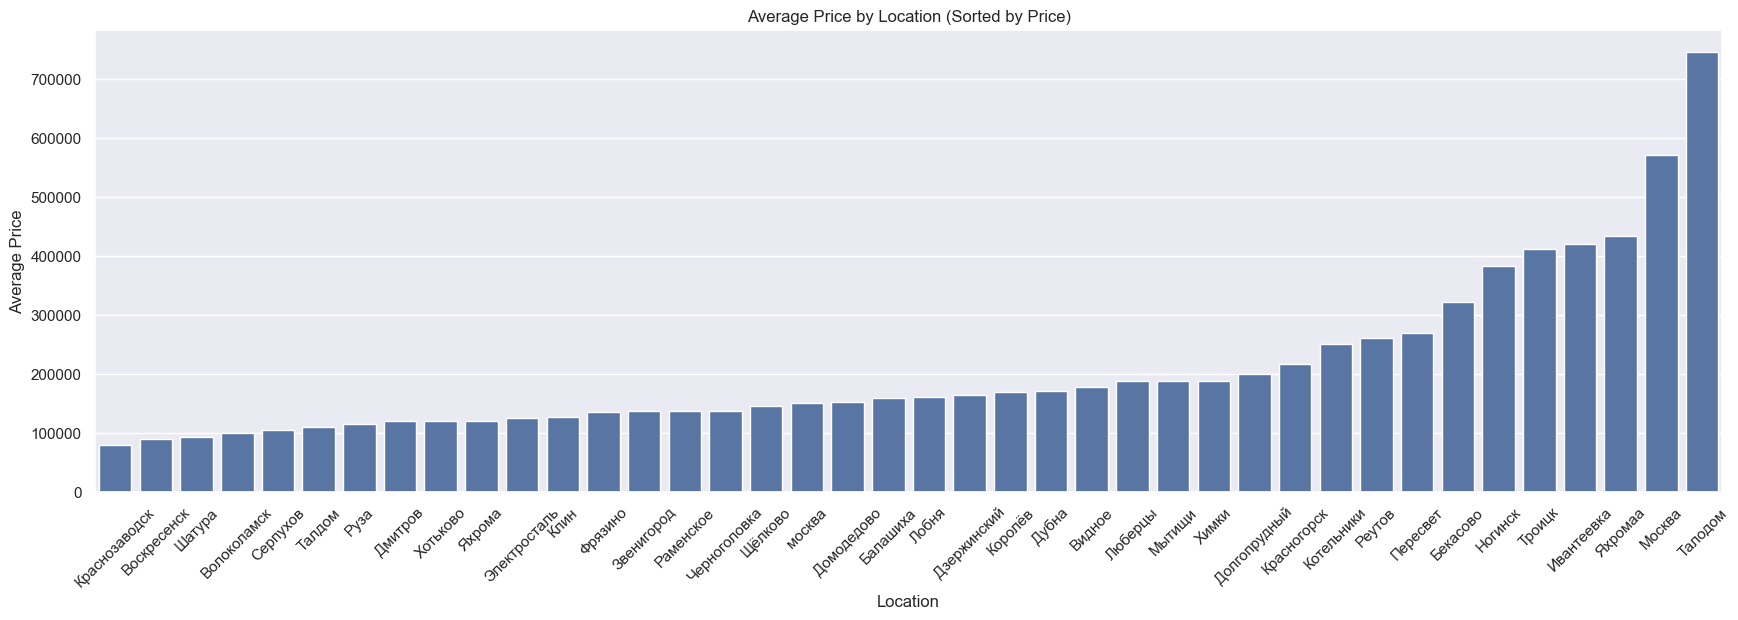

In [167]:
average_prices = df.groupby('location')['price_per_square_meter'].mean().reset_index()

# Сортировка по возрастанию средней цены
average_prices_sorted = average_prices.sort_values(by='price_per_square_meter')

sns.set(style="darkgrid")
plt.figure(figsize=(21, 6))
sns.barplot(x='location', y='price_per_square_meter', data=average_prices_sorted)
plt.title('Average Price by Location (Sorted by Price)')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

plt.show()